<a href="https://colab.research.google.com/github/ivanrango/Machine-Learning/blob/master/Trabajo_Pr%C3%A1ctico_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este trabajo práctico, el objetivo es estudiar la formación de clusters (categorías) a través de diversos algoritmos como por ejemplo KMeans, Mean
Shift, etc.
Para esto se trabajará con una base de datos de crímenes violentos ocurridos durante 1973 en EEUU en diferentes estados.
Se comienza importando la base de datos desde github:

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv'
df=pd.read_csv(url)
print(df.head(10))

    Unnamed: 0  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8


In [ ]:
df.rename(columns = {'Unnamed: 0':'States'}, inplace = True) #Se renombra la primer columna con el nombre de "States"

In [ ]:
print(df.head())

       States  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [ ]:
df.describe()# Se calculan varias medidas de interés, como medias y desvíos standard

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


A continuación se visualiza el dataframe con el objetivo de determinar si existe algún tipo de correlación en los datos:

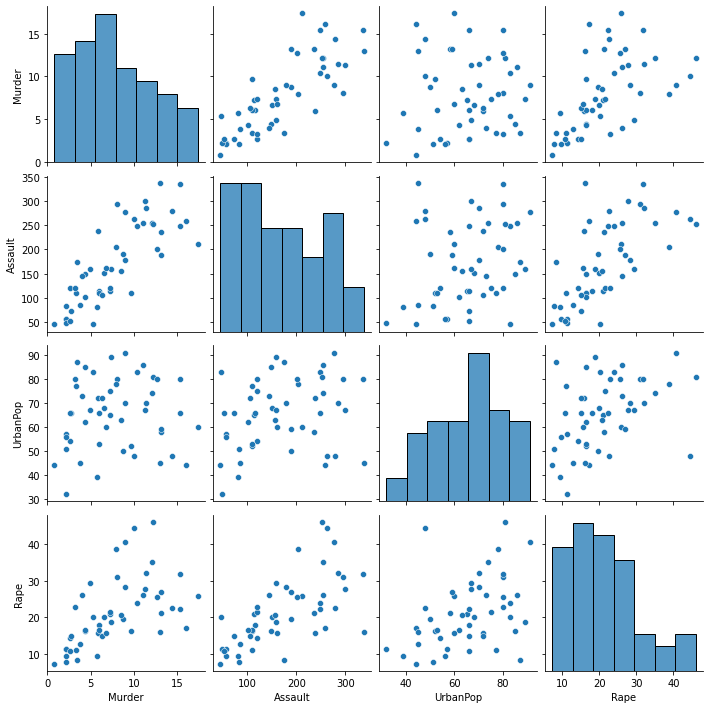

In [ ]:
import seaborn as sns

sns.pairplot(df[['Murder',	'Assault',	'UrbanPop', 'Rape']])

Se observa cierta correlación entre algunas de las columnas del dataset. Para cuantificar esta correlación, se utiliza la función .corr de pandas:

In [ ]:
variables_correlation = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
variables_correlation.corr()

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


El par que mayor correlación presenta es "Asesinato-Asalto". Por esta razón, más adelante se utilizará este par para mostrar visualmente la distribución espacial de los clusters.

El primer algoritmo que se estudia es KMeans o KMedias.
Para determinar el número óptimo de clusters que utilizará el algoritmo para agrupar a los datos, se plantea la "regla del codo", que es un método heurístico de acuerdo al cual, el número de clusters óptimos se determina cuando la curva que se genera al plotear la variancia de los datos frente al número de clusters, presenta un quiebre pronunciado.

In [ ]:

X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,79.955482
3,4,57.667578
4,5,49.993843
5,6,45.150829
6,7,39.786241
7,8,35.437858
8,9,32.516635
9,10,28.454575


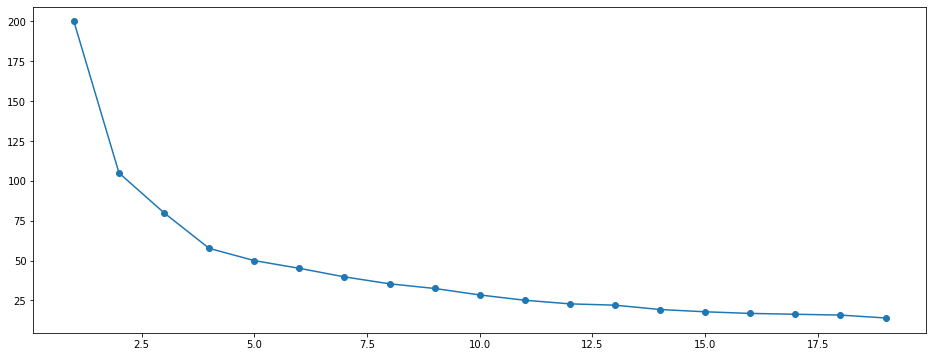

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

En este caso se observa que dicho quiebre se presenta en 4, de manera que se tendrán en cuenta 4 clusters al aplicar el algoritmo de KMeans:

In [ ]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
#X.head()
#print(df['Crime_clusters'])

,States,Murder,Assault,UrbanPop,Rape,Crime_clusters
24,Missouri,9.0,178,70,28.2,0
46,Washington,4.0,145,73,26.2,0
45,Virginia,8.5,156,63,20.7,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
38,Rhode Island,3.4,174,87,8.3,0
36,Oregon,4.9,159,67,29.3,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
20,Massachusetts,4.4,149,85,16.3,0


Ya se tienen asociados a cada estado con uno de los cuatro clusters. A continuación se presenta para cada cluster la media de cada columna del dataframe.

In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('Crime_clusters').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
Crime_clusters,,,,
0,8.2,173.3,70.6,22.8
1,5.6,112.4,65.6,17.3
2,11.8,272.6,68.3,28.4
3,3.0,62.7,53.9,11.5


In [ ]:
#df[df['Crime_clusters']==0]

In [ ]:
#df[df['Crime_clusters']==1]

In [ ]:
#df[df['Crime_clusters']==2]

In [ ]:
#df[df['Crime_clusters']==3]

In [ ]:
#sns.lmplot( 'Murder','Assault',  data=df,
#        hue = 'Crime_clusters',
#        fit_reg=False, height = 6 );

Como se mencionó más arriba, el par que presentó mayor correlación fue Asesinatos-Asaltos, por lo tanto se lo eligió para mostar como se distribuyen los clusters obtenidos mediante KMeans.
Se observan claramente en verde, amarillo, negro y celeste, y con una cruz roja se muestran los centrides de cada cluster.

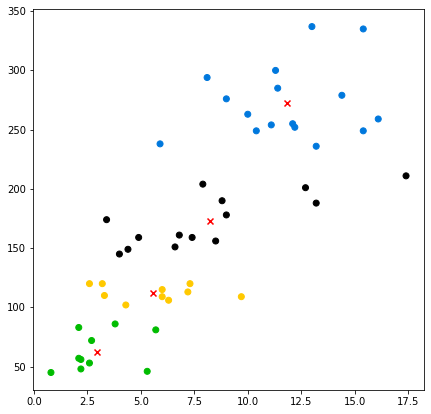

In [ ]:
import numpy as np

data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.nipy_spectral(float(i) /4) for i in clusters.labels_]); 
#print(data)
#print(centers)

Dado que se está estudiando la categorización de estados de acuerdo a los crímenes que se cometieron en ellos, surge la pregunta de si los clusters que determinó el algoritmo tienen alguna relación con la distribución espacial de los estados. 
Para determinar si esto ocurre o no, se asignó un color diferente a cada uno de los clusters, y se coloreó el mapa de los Estados Unidos.

In [ ]:
!pip install plotly==4.9.0

## Clusters:

In [ ]:
import pandas as pd
import requests
import plotly.express as px

repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df, 
                    geojson=us_regions_geo, 
                    locations='States', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='Crime_clusters', #El color depende de las cantidades
                    color_continuous_scale="Matter", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Crimenes violentos en EEUU divididos en clusters (KMeans)',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

## Asesinatos:

In [ ]:
import pandas as pd
import requests
import plotly.express as px

repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df, 
                    geojson=us_regions_geo, 
                    locations='States', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='Murder', #El color depende de las cantidades
                    color_continuous_scale="Plasma", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Asesinatos en EEUU cada 100 mil personas',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

## Asaltos:

In [ ]:
import pandas as pd
import requests
import plotly.express as px

repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df, 
                    geojson=us_regions_geo, 
                    locations='States', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='Assault', #El color depende de las cantidades
                    color_continuous_scale="Plasma", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Asaltos en EEUU cada 100 mil personas',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

## Violaciones

In [ ]:
import pandas as pd
import requests
import plotly.express as px

repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df, 
                    geojson=us_regions_geo, 
                    locations='States', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='Rape', #El color depende de las cantidades
                    color_continuous_scale="Plasma", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Violaciones en EEUU cada 100 mil personas ',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

# Mean Shifts:

In [ ]:
df1=df.drop(columns=['States','Crime_clusters'])
print(df1.head(3))

   Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0


In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

X = df1

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Número estimado de clusters : %d" % n_clusters_)

Número estimado de clusters : 6


In [ ]:
# New list called cluster
etiquetas = list(labels)
# Adding cluster to our data set
df['etiquetas'] = etiquetas

In [ ]:
df=df.drop(columns=['Crime_clusters'])
print(df.head(10))

        States  Murder  Assault  UrbanPop  Rape  etiquetas
0      Alabama    13.2      236        58  21.2          1
1       Alaska    10.0      263        48  44.5          1
2      Arizona     8.1      294        80  31.0          1
3     Arkansas     8.8      190        50  19.5          2
4   California     9.0      276        91  40.6          1
5     Colorado     7.9      204        78  38.7          2
6  Connecticut     3.3      110        77  11.1          0
7     Delaware     5.9      238        72  15.8          1
8      Florida    15.4      335        80  31.9          4
9      Georgia    17.4      211        60  25.8          2


In [ ]:
ms_mean_etiquetas = pd.DataFrame(round(df.groupby('etiquetas').mean(),1))
ms_mean_etiquetas

,Murder,Assault,UrbanPop,Rape
etiquetas,,,,
0,5.4,115.4,66.3,18.1
1,11.5,263.5,69.1,29.0
2,8.5,175.5,70.5,22.6
3,3.0,62.7,53.9,11.5
4,15.4,335.0,80.0,31.9
5,13.0,337.0,45.0,16.1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



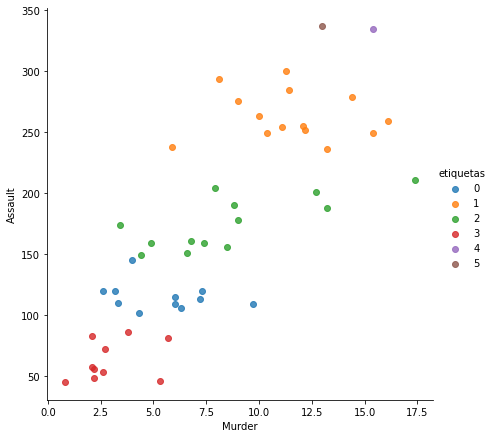

In [ ]:
import seaborn as sns

sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'etiquetas',
        fit_reg=False, height = 6);

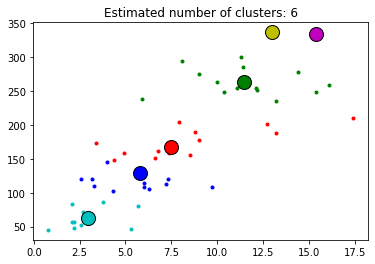

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

X = np.array(X)

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df, 
                    geojson=us_regions_geo, 
                    locations='States', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='etiquetas', #El color depende de las cantidades
                    color_continuous_scale="Matter", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Crimenes violentos en EEUU divididos en clusters (Mean Shift)',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()
